In [24]:
#seq 9 | sed 's,.*,&e-9,' > lvs.lis
seq 9 | sed 's,.*,&e-8,' > lvs.lis
seq 9 | sed 's,.*,&e-7,' >> lvs.lis
seq 3 | sed 's,.*,&e-6,' >> lvs.lis

In [31]:
contour_map sm.flux contour_map.map binimg=contour_map.img dist=250 \
  maxcontour=125 clob+ mode=h levels="@lvs.lis" \
  verb=1
  

contour_map
          infile = sm.flux
         outfile = contour_map.map
          binimg = contour_map.img
        distance = 250
           shape = circle
          levels = @lvs.lis
         nlevels = 20
           scale = log
     maxcontours = 125
         verbose = 1
         clobber = yes
            mode = h

Contour lower limit: 2e-07 (706,588)
Contour lower limit: 1e-07 (688,601)
Contour lower limit: 9e-08 (751,599)
Contour lower limit: 8e-08 (690,550)
Contour lower limit: 8e-08 (767,649)
Contour lower limit: 7e-08 (729,678)
Contour lower limit: 7e-08 (712,548)
Contour lower limit: 6e-08 (771,608)
Contour lower limit: 6e-08 (656,657)
Contour lower limit: 6e-08 (667,678)
Contour lower limit: 6e-08 (668,679)
Contour lower limit: 5e-08 (790,634)
Contour lower limit: 5e-08 (649,641)
Contour lower limit: 4e-08 (652,673)
Contour lower limit: 4e-08 (779,594)
Contour lower limit: 4e-08 (777,720)
Contour lower limit: 4e-08 (826,732)
Contour lower limit: 4e-08 (759,738)
Contour lower 

In [32]:
merge_too_small contour_map.map contour_map_min5px.map \
  meth=area min=25 clob+ img=sm.flux binimg=contour_map_min5px.img 

In [33]:
dmimgfilt contour_map_min5px.map - max "box(0,0,3,3)" numiter=3 | \
  dmimgfilt - zz min "box(0,0,3,3)" numiter=3  clob+


In [34]:
dmimgthresh zz - cut=INDEF out=0 | \
dmmaskbin "sm.flux" "-[opt type=i4]" - | \
dmcopy "-[sky=region(acisf13201_repro_fov1.fits[ccd_id=0:3])][opt full,null=nan]"  zz.img clob+

In [35]:
dmimggrad zz zz.grad sobel mag clob+

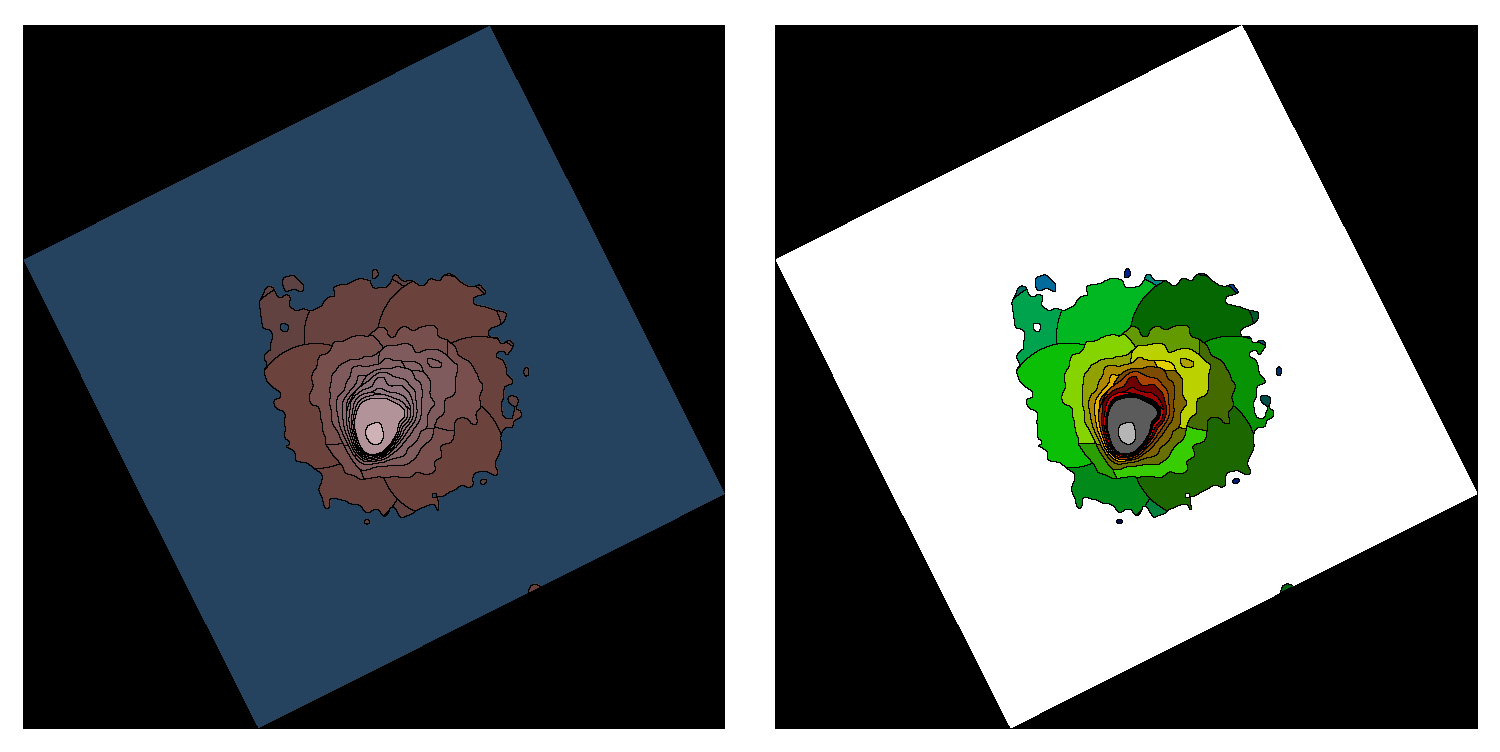

In [36]:
ds9 -geometry 1500x800 zz.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -nan black \
    -mask color black -mask zz.grad \
    -frame new -tile -nomask \
    zz -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask zz.grad \
    -saveimage png contour_map_min5px.png -exit

display < contour_map_min5px.png